In [91]:
import math
from multi_linear import MultiLinearClassification
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Multi Linear

###### Load data

In [250]:
X, y = make_blobs(
    n_samples = 3000,
    n_features = 8, 
    centers = 10)

y = y%2

In [269]:
X, y = make_moons(2000, noise  = 0.1)

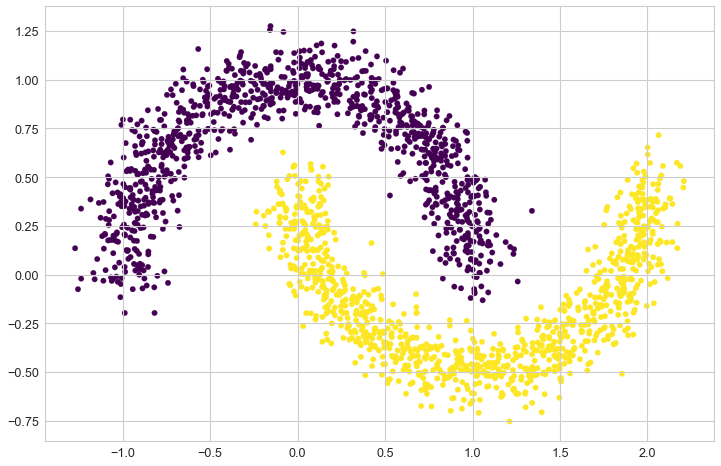

In [270]:
# Plot data
plt.scatter(x = X[:, 0], y = X[:,1], c = y)

In [271]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

###### Train model

In [279]:
mlc = MultiLinearClassification(n = 15, n_iter = 10000)
mlc.fit(X_train, y_train)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\ubuntu20.04\projects\complex_machine_learning\multi_linear\multi_linear.py:101: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*np.prod(z, axis = 1)))
100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [06:12<00:00, 26.84it/s]


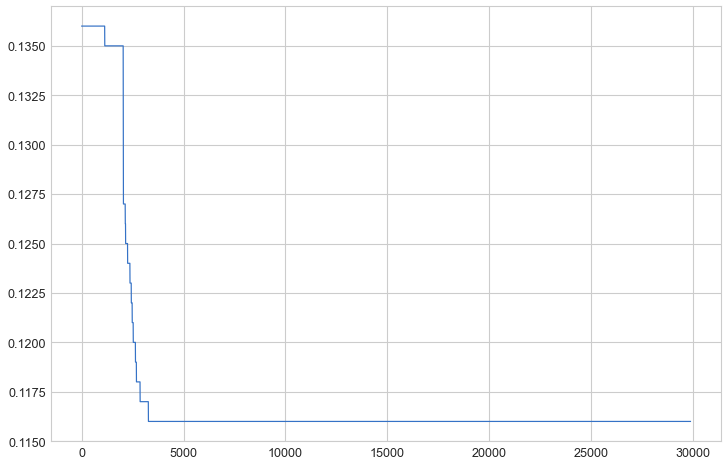

In [280]:
# Plot loss
plt.plot(mlc.loss[100:])

In [281]:
y_pred = mlc.predict(X_test)

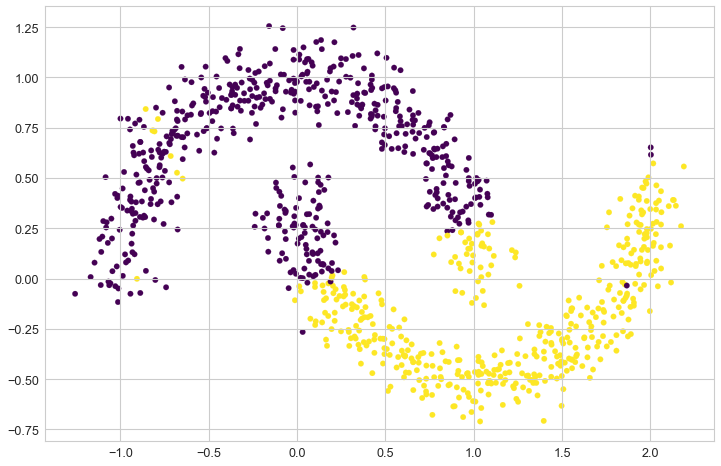

In [282]:
# Plot prediction
plt.scatter(x = X_test[:,0], y = X_test[:,1], c = y_pred)

In [283]:
print(f"Loss: {mlc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y_test == y_pred*1)*100/len(y_test)}")

Loss: 0.116
Percentage mapped correctly: 84.9


## Compare to Other Models

#### Sklearn Logestic Regression

Percentage mapped correctly: 99.6


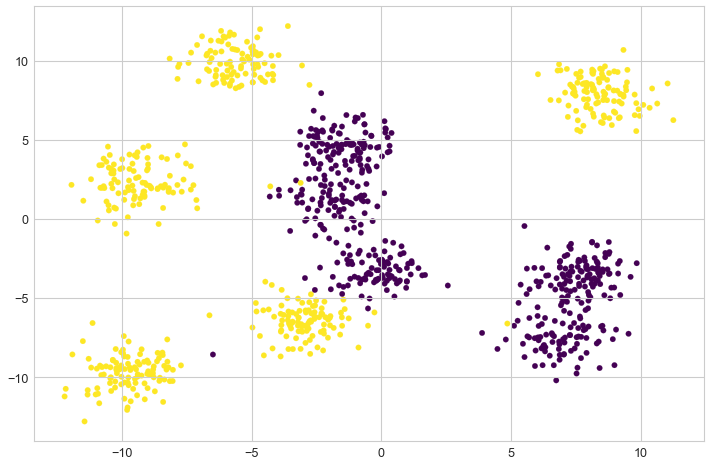

In [239]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()

log_r.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == log_r.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = log_r.predict(X_test))

#### SGDClassifier

Percentage mapped correctly: 99.3


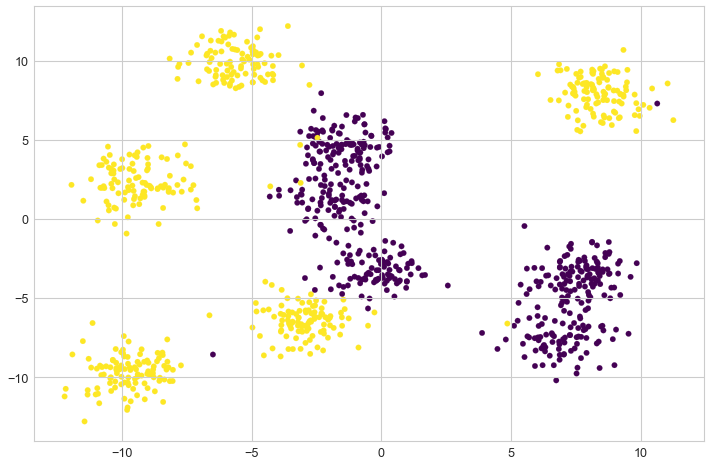

In [240]:
from sklearn.linear_model import SGDClassifier
sgd_c = SGDClassifier()

sgd_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == sgd_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = sgd_c.predict(X_test))

#### MLPClassifier

Percentage mapped correctly: 100.0


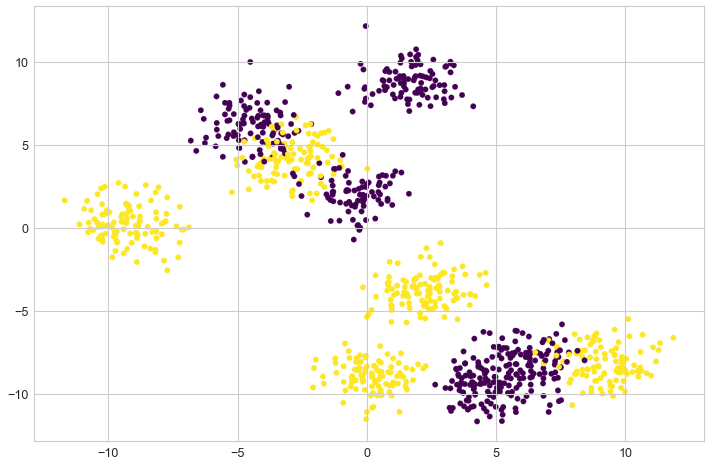

In [260]:
from sklearn.neural_network import MLPClassifier
mlp_c = MLPClassifier()

mlp_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == mlp_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = mlp_c.predict(X_test))

#### SVM

Percentage mapped correctly: 100.0


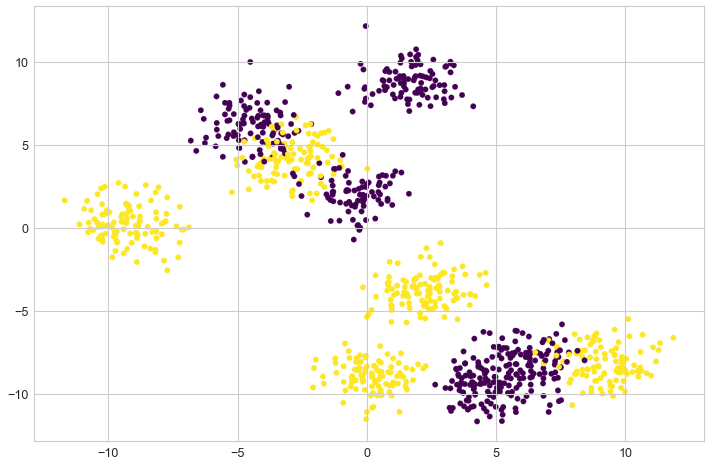

In [261]:
from sklearn.svm import SVC
svm_c = SVC()

svm_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == svm_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = svm_c.predict(X_test))

#### RandomForestClassifier

Percentage mapped correctly: 99.5


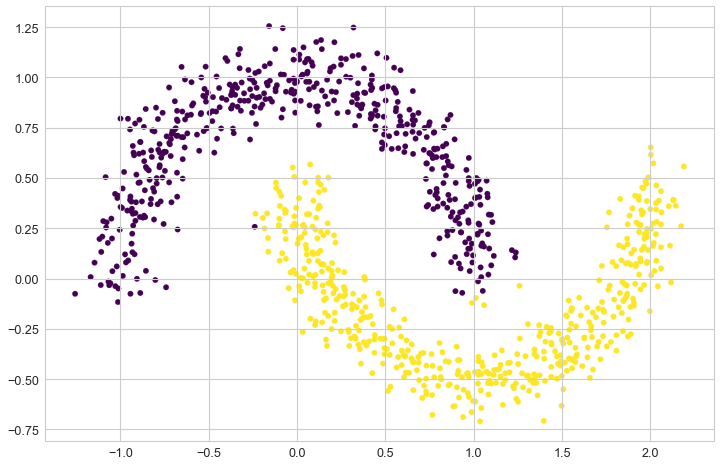

In [277]:
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()

rf_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == rf_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = rf_c.predict(X_test))